In [1]:
#%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# BASELINE
# TFIDF
# SICK_VERBADJNOUN_lemma	0.611	0.091		# TFIDF
# SICK_ADJNOUN_lemma	0.558	0.111			# TFIDF
# SICK_VERBADJNOUN_orth	0.568	0.106		# TFIDF
# SICK_ADJNOUN_orth	0.542	0.119			# TFIDF

In [3]:
sick_test = pd.DataFrame.from_csv('SA_results/SICK_test_annotated.txt', sep='\t', header=0)
sick_test_overlap = pd.DataFrame.from_csv('SA_results/semeval_overlap_test.tsv', sep='\t', header=0)
sick_test['relatedness_score'].corr(sick_test_overlap['relatedness_score'])
#0.62701073200106172

0.62701073200106172

In [73]:
results_all = pd.DataFrame.from_csv('SA_results/scores_all_new.tsv', sep='\t', index_col=['crossfold_id','dev_file_index'])
results_all['dependency available'] = results_all.apply(lambda row: 'NO' if 'blanked' in row.train_data_path else 'YES', axis=1)
results_all['order aware'] = results_all.apply(lambda row: 'YES' if 'LSTM' in row.tree_embedder else 'NO', axis=1)
#results_all = results_all.set_index(['dependency available', 'order aware'])
results_all['pearson_tfidf'] = 0.618864
results_all['mse_tfidf'] = 0.082341
#results_all.set_index(['crossfold_id','dev_file_index'])
results_all[:10]

clipping      optimizer  lexicon_trainable  \
crossfold_id dev_file_index                                               
0            0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   

                             early_stop_queue  keep_prob  auto_restore  \
crossfold_id dev_file_index                                              
0            0                             25        0.8         False   
             0                             25        0.8         False   
             0                             25        0.8         False   
             0                             25        0.8         False   
             1                             25        0.8         False   
             1                             25        0.8         False   
             1                             25        0.8         False   
             1                             25        0.8         False   
             2                             25        0.8         False   
             2                             25        0.8         False   

                             batch_size  \
crossfold_id dev_file_index               
0            0                      100   
             0                      100   
             0                      100   
             0                      100   
             1                      100   
             1                      100   
             1                      100   
             1                      100   
             2                      100   
             2                      100   

                                                               run_description  \
crossfold_id dev_file_index                                                      
0            0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             2               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             2               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   

                              epochs  \
crossfold_id dev_file_index            
0            0               1000000   
             0               1000000   
             0               1000000   
             0               1000000   
             1               1000000   
             1               1000000   
             1               1000000   
             1               1000000   
             2               1000000   
             2               1000000   

                                                               train_data_path  \
crossfold_id dev_file_index                                                      
0            0               /media/arne/WIN/ML/data/corpora/SICK/process_s...   
          

In [86]:
res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']].set_index(['dependency available', 'order aware']).rename(columns={'score_pearson': 'pearson', 'score_mse':'mse'})
res

,,pearson,mse,pearson_tfidf,mse_tfidf
dependency available,order aware,,,,
NO,NO,0.839656,0.028558,0.618864,0.082341
YES,NO,0.842555,0.026927,0.618864,0.082341
NO,YES,0.837874,0.020711,0.618864,0.082341
YES,YES,0.839254,0.020170,0.618864,0.082341
NO,NO,0.835462,0.029643,0.618864,0.082341
YES,NO,0.838937,0.027700,0.618864,0.082341
NO,YES,0.833905,0.021339,0.618864,0.082341
YES,YES,0.839310,0.020403,0.618864,0.082341
NO,NO,0.839617,0.027691,0.618864,0.082341


In [6]:
# get subsets
#res.xs('NO', level='dependency available')
#res.xs('NO', level='order aware')
s = res.xs(('NO', 'NO'), level=['order aware', 'dependency available'])
#pd.Series(s['pearson'])

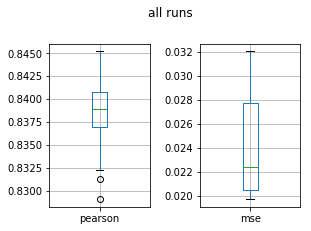

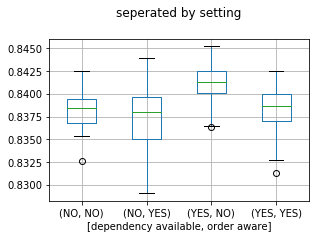

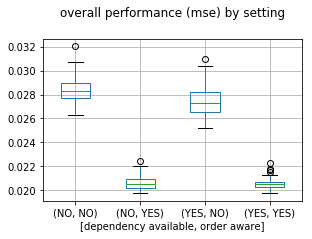

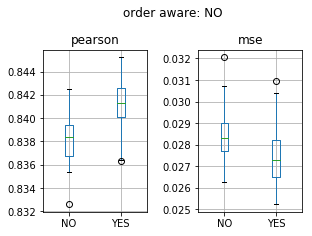

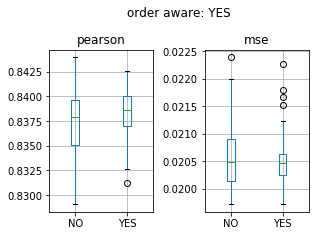

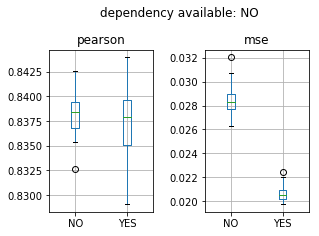

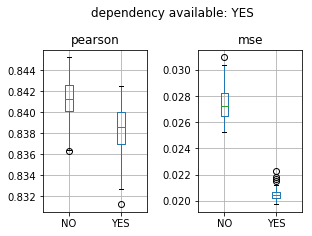

In [66]:
from matplotlib import rcParams

#rcParams['axes.titlepad'] = 20 
#rcParams['axes.titlepad'] = 20 
images = {}
bootstrap=10000

figsize = (4.5, 3)
fig_merged, axs = plt.subplots(1,2, figsize=figsize)
res.boxplot(column=['pearson'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[0], bootstrap=bootstrap)
#axs[0].minorticks_on()
#axs[0].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
res.boxplot(column=['mse'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[1], bootstrap=bootstrap)
#axs[1].minorticks_on()
#axs[1].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
fig_merged.suptitle('all runs', y=1.05)
plt.subplots_adjust(wspace=0.5)
images['fig_merged'] = fig_merged

y_title = 1.0
y_suptitle = 1.1

axs = res.boxplot(column=['pearson'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('seperated by setting', y=y_suptitle)
fig_sep_pearson = axs.get_figure()
fig_sep_pearson.suptitle('')
images['fig_sep_pearson'] = fig_sep_pearson

axs = res.boxplot(column=['mse'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('overall performance (mse) by setting', y=y_suptitle)
fig_sep_mse = axs.get_figure()
fig_sep_mse.suptitle('')
images['fig_sep_mse'] = fig_sep_mse

fig_sep_dep_orderno, axs_sep_dep = plt.subplots(1,2, figsize=figsize)
res.xs('NO', level='order aware').boxplot(column=['pearson'], by=['dependency available'], ax=axs_sep_dep[0], bootstrap=bootstrap)
axs_sep_dep[0].set_title('pearson', y=y_title)
axs_sep_dep[0].set_xlabel('')
res.xs('NO', level='order aware').boxplot(column=['mse'], by=['dependency available'], ax=axs_sep_dep[1], bootstrap=bootstrap)
axs_sep_dep[1].set_title('mse', y=y_title)
axs_sep_dep[1].set_xlabel('')
fig_sep_dep_orderno.suptitle('order aware: NO', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_dep_orderno'] = fig_sep_dep_orderno

fig_sep_dep_orderyes, axs_sep_dep = plt.subplots(1,2, figsize=figsize)
res.xs('YES', level='order aware').boxplot(column=['pearson'], by=['dependency available'], ax=axs_sep_dep[0], bootstrap=bootstrap)
axs_sep_dep[0].set_title('pearson', y=y_title)
axs_sep_dep[0].set_xlabel('')
res.xs('YES', level='order aware').boxplot(column=['mse'], by=['dependency available'], ax=axs_sep_dep[1], bootstrap=bootstrap)
axs_sep_dep[1].set_title('mse', y=y_title)
axs_sep_dep[1].set_xlabel('')
fig_sep_dep_orderyes.suptitle('order aware: YES', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_dep_orderyes'] = fig_sep_dep_orderyes

fig_sep_order_depno, axs_sep_order = plt.subplots(1,2, figsize=figsize)
res.xs('NO', level='dependency available').boxplot(column=['pearson'], by=['order aware'], ax=axs_sep_order[0], bootstrap=bootstrap)
axs_sep_order[0].set_title('pearson', y=y_title)
axs_sep_order[0].set_xlabel('')
res.xs('NO', level='dependency available').boxplot(column=['mse'], by=['order aware'], ax=axs_sep_order[1], bootstrap=bootstrap)
axs_sep_order[1].set_title('mse', y=y_title)
axs_sep_order[1].set_xlabel('')
fig_sep_order_depno.suptitle('dependency available: NO', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_order_depno'] = fig_sep_order_depno

fig_sep_order_depyes, axs_sep_order = plt.subplots(1,2, figsize=figsize)
res.xs('YES', level='dependency available').boxplot(column=['pearson'], by=['order aware'], ax=axs_sep_order[0], bootstrap=bootstrap)
axs_sep_order[0].set_title('pearson', y=y_title)
axs_sep_order[0].set_xlabel('')
res.xs('YES', level='dependency available').boxplot(column=['mse'], by=['order aware'], ax=axs_sep_order[1], bootstrap=bootstrap)
axs_sep_order[1].set_title('mse', y=y_title)
axs_sep_order[1].set_xlabel('')
fig_sep_order_depyes.suptitle('dependency available: YES', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_order_depyes'] = fig_sep_order_depyes




In [64]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from math import sqrt
import scipy.stats as st

def bootstrap_convidence(values, n_iterations=1000, alpha=0.95):
    #values = res.xs(('NO', 'NO'))['pearson']
    mean_b = np.mean(values)
    std_b = np.std(values)
    n_b_root = sqrt(len(values))
    # configure bootstrap
    #n_iterations = 10000
    n_size = int(len(values) * 0.50)
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        samples = resample(values, n_samples=n_size)
        t_i = (np.mean(samples) - mean_b) * n_b_root / np.std(samples)
        stats.append(t_i)
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    
    # confidence intervals
    #print(stats)
    #p_lower = ((1.0-alpha)/2.0) * 100
    p_lower = (alpha/2.) * 100
    #p = (alpha / 2.0) * 100
    lower = numpy.percentile(stats, p_lower)
    #lower = st.t._ppf(p_lower, n_iterations-1)
    #print('lower %.2f: %.3f' % (p_lower, lower))
    #p_upper = (alpha+((1.0-alpha)/2.0)) * 100
    p_upper = (1.-alpha/2.) * 100
    #p = (1.0 - alpha / 2.0) * 100
    upper = numpy.percentile(stats, p_upper)
    #upper = st.t._ppf(p_upper, n_iterations-1)
    #print('upper %.1f: %.3f' % (p_upper, upper))
    c_intv = [mean_b + lower * std_b / n_b_root, mean_b + upper * std_b / n_b_root]
    return c_intv

#def mean_confidence(values, alpha=0.95):
#    return st.t.interval(alpha, len(values)-1, loc=np.mean(values), scale=st.sem(values))

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h


alpha = 0.5
for measure in ['pearson', 'mse']:
    print('confidence intervalls for %s (order aware, dependency available):' % measure)
    values = res[measure]
    conf_simple = mean_confidence_interval(values, confidence=1-alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % ('ALL', 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
    c_boot = bootstrap_convidence(values, alpha=alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % ('ALL', 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
    for setting in [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]:
        values = res.xs(setting)[measure]
        conf_simple = mean_confidence_interval(values, confidence=1-alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % (str(setting), 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
        c_boot = bootstrap_convidence(values=values, alpha=alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % (str(setting), 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
print('finished')  
#print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

confidence intervalls for pearson (order aware, dependency available):
ALL             50.0% confidence interval: 0.8387 and 0.8389 (0.0003) True naive
ALL             50.0% confidence interval: 0.8386 and 0.8390 (0.0004) True
('NO', 'NO')    50.0% confidence interval: 0.8380 and 0.8383 (0.0004) True naive
('NO', 'NO')    50.0% confidence interval: 0.8379 and 0.8384 (0.0005) True
('NO', 'YES')   50.0% confidence interval: 0.8372 and 0.8378 (0.0006) True naive
('NO', 'YES')   50.0% confidence interval: 0.8371 and 0.8379 (0.0008) True
('YES', 'NO')   50.0% confidence interval: 0.8411 and 0.8415 (0.0004) True naive
('YES', 'NO')   50.0% confidence interval: 0.8410 and 0.8416 (0.0007) True
('YES', 'YES')  50.0% confidence interval: 0.8380 and 0.8385 (0.0005) True naive
('YES', 'YES')  50.0% confidence interval: 0.8380 and 0.8387 (0.0007) True
confidence intervalls for mse (order aware, dependency available):
ALL             50.0% confidence interval: 0.0240 and 0.0244 (0.0004) True naive
A

In [63]:
ex_values = np.array([110, 112, 106, 90, 96, 118, 108, 114, 107, 90, 85, 84, 113, 105, 90, 104])
print(ex_values.mean())
s = ex_values.std(ddof=1)
print(s*s)
alpha = 0.05
high_p = 1. - (alpha / 2.)
low_p = alpha / 2.
print(low_p)
print(high_p)
low = np.percentile(ex_values, low_p * 100)
high = np.percentile(ex_values, high_p * 100)
print(low)
print(high)

print(mean_confidence_interval(ex_values))

102.0
123.733333333
0.025
0.975
84.375
116.5
(102.0, 96.072679350832317, 107.92732064916768)


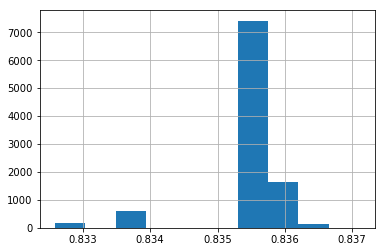

In [121]:
from sklearn.utils import resample
def bootstrap_5th_percentile(data, n_bootstraps):
    bootstraps = []
    for _ in xrange(n_bootstraps):
        # Sample with replacement from data
        samples = resample(data)
        # Then we take the fifth percentile!
        bootstraps.append(np.percentile(samples, 5))
    return pd.Series(bootstraps)
values = res.xs(('NO', 'NO'))['pearson']
bootstraps = bootstrap_5th_percentile(values, 10000)
bootstraps.hist()

In [192]:
import subprocess
path = "SA_results/images"
for name in images:
    p = os.path.join(path, name)
    # save figure as svg
    images[name].savefig('%s.svg' % p)
    # convert for latex
    subprocess.call(['inkscape','-D','-z','--file=%s.svg' % p, '--export-pdf=%s.pdf' % p, '--export-latex'])
    print('finished %s' % p)

finished SA_results/images/fig_sep_dep_orderno
finished SA_results/images/fig_sep_order_depyes
finished SA_results/images/fig_sep_mse
finished SA_results/images/fig_sep_pearson
finished SA_results/images/fig_merged
finished SA_results/images/fig_sep_order_depno
finished SA_results/images/fig_sep_dep_orderyes


In [29]:
print('pearson       mean:  %f' % res[['pearson']].mean().values[0])
print('pearson        std:  %f' % res[['pearson']].std().values[0])
print('pearson_tfidf mean:  %f' % res[['pearson_tfidf']].mean().values[0])
print('mse           mean:  %f' % res[['mse']].mean().values[0])
print('mse            std:  %f' % res[['mse']].std().values[0])
print('mse_tfidf     mean:  %f' % res[['mse_tfidf']].mean().values[0])

print(res.groupby(['dependency available', 'order aware']).mean())
print(res.groupby(['dependency available', 'order aware']).std())
print(res.groupby(['dependency available']).std())
print(res.groupby(['order aware']).std())


pearson       mean:  0.838809
pearson        std:  0.002874
pearson_tfidf mean:  0.618864
mse           mean:  0.024207
mse            std:  0.003812
mse_tfidf     mean:  0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.838150  0.028364       0.618864   0.082341
                     YES          0.837504  0.020598       0.618864   0.082341
YES                  NO           0.841277  0.027425       0.618864   0.082341
                     YES          0.838292  0.020524       0.618864   0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.001880  0.001181            0.0        0.0
                     YES          0.003102  0.000609            0.0        0.0
YES                  NO       

In [100]:
#res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']]
res_mse = results_all[['dependency available', 'order aware','score_mse']]
res_mse

dependency available order aware  score_mse
crossfold_id dev_file_index                                            
0            0                                NO          NO   0.028558
             0                               YES          NO   0.026927
             0                                NO         YES   0.020711
             0                               YES         YES   0.020170
             1                                NO          NO   0.029643
             1                               YES          NO   0.027700
             1                                NO         YES   0.021339
             1                               YES         YES   0.020403
             2                                NO          NO   0.027691
             2                               YES          NO   0.030219
             2                                NO         YES   0.019871
             2                               YES         YES   0.020779
             3                                NO          NO   0.027694
             3                               YES          NO   0.027740
             3                                NO         YES   0.020246
             3                               YES         YES   0.021798
             4                                NO          NO   0.027870
             4                               YES          NO   0.026084
             4                                NO         YES   0.020566
             4                               YES         YES   0.020635
1            0                                NO          NO   0.027841
             0                               YES          NO   0.026537
             0                                NO         YES   0.020444
             0                               YES         YES   0.020806
             1                                NO          NO   0.030558
             1                               YES          NO   0.025562
             1                                NO         YES   0.021352
             1                               YES         YES   0.020453
             2                                NO          NO   0.027728
             2                               YES          NO   0.028392
...                                          ...         ...        ...
8            2                                NO         YES   0.020482
             2                               YES         YES   0.021220
             3                                NO          NO   0.029804
             3                               YES          NO   0.026740
             3                                NO         YES   0.020130
             3                               YES         YES   0.020330
             4                                NO          NO   0.026768
             4                               YES          NO   0.026421
             4                                NO         YES   0.020459
             4                               YES         YES   0.020324
9            0                                NO          NO   0.026270
             0                               YES          NO   0.027220
             0                                NO         YES   0.021485
             0                               YES         YES   0.020527
             1                                NO          NO   0.029453
             1                               YES          NO   0.028653
             1                                NO         YES   0.020418
             1                               YES         YES   0.019740
             2                                NO          NO   0.028301
             2                               YES          NO   0.028020
             2                                NO         YES   0.019710
             2                               YES         YES   0.020561
             3                                NO          NO   0.030